In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import math

In [7]:


def plot_profiles(profiles, max_val=None, min_val=None):
    max_h = 0       # red
    min_h = 120     # blue
    if not max_val:
        max_val = np.max(profiles)
    if not min_val:
        min_val = np.min(profiles)
    #print(max_val, min_val)
    heat_map_val = np.clip(profiles, min_val, max_val)
    heat_map = np.zeros(
        (heat_map_val.shape[0], heat_map_val.shape[1], 3), dtype=np.uint8)
    # print(heat_map_val.shape)
    heat_map[:, :, 0] = heat_map_val / \
        (max_val + 1e-6) * (max_h - min_h) + min_h
    heat_map[:, :, 1] = np.ones(heat_map_val.shape) * 255
    heat_map[:, :, 2] = np.ones(heat_map_val.shape) * 255
    heat_map = cv2.cvtColor(heat_map, cv2.COLOR_HSV2BGR)
    return heat_map


def plot_profiles_split_channels(profiles, n_channels, maxval=None, minval=None):
    channel_width = profiles.shape[0] // n_channels

    profiles_img = np.zeros(
        ((channel_width + 5) * n_channels, profiles.shape[1], 3))

    for n in range(n_channels):
        channel_profiles = profiles[n * channel_width: (n + 1) * channel_width]
        profiles_img[n * (channel_width + 5): (n + 1) * (channel_width + 5) - 5,
                     :, :] = plot_profiles(channel_profiles, maxval, minval)

    return profiles_img

#change from visualizing as 1 channel to 4 channels
def vis(input):
    img_input = input.copy()
    diff_profiles_img = plot_profiles_split_channels(img_input.T, 1, 50000000, -50000000)
    #profiles11 = plot_profiles(profiles1, 20000000, -20000000)
    acous_npy_img = cv2.cvtColor(np.float32(diff_profiles_img), cv2.COLOR_BGR2RGB)
    plt.imshow(acous_npy_img.astype(np.uint16), aspect = 'auto')
    plt.savefig('./fake_img.png')

def vis_save(input):
    img_input = input.copy()
    diff_profiles_img = plot_profiles_split_channels(img_input.T, 1, 50000000, -50000000)
    #profiles11 = plot_profiles(profiles1, 20000000, -20000000)
    acous_npy_img = cv2.cvtColor(np.float32(diff_profiles_img), cv2.COLOR_BGR2RGB)
    plt.imshow(acous_npy_img.astype(np.uint16), aspect = 'auto')
    plt.savefig('./fake_img.png')

def vis_out(input):
    img_input = input.copy()
    diff_profiles_img = plot_profiles_split_channels(img_input.T, 1, 50000000, -50000000)
    #profiles11 = plot_profiles(profiles1, 20000000, -20000000)
    acous_npy_img = cv2.cvtColor(np.float32(diff_profiles_img), cv2.COLOR_BGR2RGB)
    return acous_npy_img.astype(np.uint16)

def vis_out_one_channel(input):
    img_input = input.copy()
    diff_profiles_img = plot_profiles(img_input, 50000000, -50000000)
    # diff_profiles_img = plot_profiles_split_channels(img_input.T, 1, 50000000, -50000000)
    #profiles11 = plot_profiles(profiles1, 20000000, -20000000)
    acous_npy_img = cv2.cvtColor(np.float32(diff_profiles_img), cv2.COLOR_BGR2RGB)
    return acous_npy_img.astype(np.uint16)


In [ ]:
# left
data_dir = '/data/asl_test/dataset/session_0101/acoustic/diff/'
npy_files = glob.glob(os.path.join(data_dir, '*.npy'))


letter = 'Z'
a_files = [f for f in npy_files if f.endswith(f'_{letter}.npy')]
n = len(a_files)
cols = 4
rows = math.ceil(n / cols)

# Compute global min/max for all images in the grid
all_vals = np.concatenate([np.load(f)[3].flatten() for f in a_files])
global_min = np.percentile(all_vals, 0)
global_max = np.percentile(all_vals, 99.97)  # Adjust as needed

# Get shape for aspect ratio
sample_data = np.load(a_files[0])
h, w = sample_data[3].shape
subplot_width = 4
subplot_height = subplot_width * h / w
fig_width = subplot_width * cols
fig_height = subplot_height * rows

fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

for idx, file in enumerate(a_files):
    data = np.load(file)
    channel_4 = data[3]
    img = plot_profiles(channel_4, max_val=global_max, min_val=global_min)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    row = idx // cols
    col = idx % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.imshow(img_rgb, aspect='auto')
    ax.set_title(os.path.basename(file))
    # ax.axis('off')

# Hide any unused subplots
for idx in range(n, rows*cols):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')

plt.show()



In [ ]:
# right 
data_dir = '/data/asl_test/dataset/session_0201/acoustic/diff/'
npy_files = glob.glob(os.path.join(data_dir, '*.npy'))


letter = 'Z'
a_files = [f for f in npy_files if f.endswith(f'_{letter}.npy')]
n = len(a_files)
cols = 4
rows = math.ceil(n / cols)

# Compute global min/max for all images in the grid
all_vals = np.concatenate([np.load(f)[3].flatten() for f in a_files])
global_min = np.percentile(all_vals, 0)
global_max = np.percentile(all_vals, 99.97)  # Adjust as needed

# Get shape for aspect ratio
sample_data = np.load(a_files[0])
h, w = sample_data[3].shape
subplot_width = 4
subplot_height = subplot_width * h / w
fig_width = subplot_width * cols
fig_height = subplot_height * rows

fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

for idx, file in enumerate(a_files):
    data = np.load(file)
    channel_4 = data[3]
    img = plot_profiles(channel_4, max_val=global_max, min_val=global_min)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    row = idx // cols
    col = idx % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.imshow(img_rgb, aspect='auto')
    ax.set_title(os.path.basename(file))
    # ax.axis('off')

# Hide any unused subplots
for idx in range(n, rows*cols):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')

plt.show()



In [ ]:
# right 
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
#visualize all the A files in a grid
for letter in letters:
    letter_files =[f for f in npy_files if f.endswith(f'_{letter}.npy')]
    
    n = len(letter_files)
    cols = 4
    rows = math.ceil(n / cols)

    # Compute global min/max for all images in the grid
    all_vals = np.concatenate([np.load(f)[3].flatten() for f in letter_files])
    global_min = np.percentile(all_vals, 0)
    global_max = np.percentile(all_vals, 99.97)  # Adjust as needed

    # Get shape for aspect ratio
    sample_data = np.load(letter_files[0])
    h, w = sample_data[3].shape
    subplot_width = 4
    subplot_height = subplot_width * h / w
    fig_width = subplot_width * cols
    fig_height = subplot_height * rows

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

    for idx, file in enumerate(letter_files):
        data = np.load(file)
        channel_4 = data[3]
        img = plot_profiles(channel_4, max_val=global_max, min_val=global_min)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        row = idx // cols
        col = idx % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.imshow(img_rgb, aspect='auto')
        ax.set_title(os.path.basename(file))
        # ax.axis('off')

    # Hide any unused subplots
    for idx in range(n, rows*cols):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.axis('off')

    plt.show()

In [ ]:
# left 
data_dir = '/data/asl_test/dataset/session_0101/acoustic/diff/'
npy_files = glob.glob(os.path.join(data_dir, '*.npy'))


letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
#visualize all the A files in a grid
for letter in letters:
    letter_files =[f for f in npy_files if f.endswith(f'_{letter}.npy')]
    
    n = len(letter_files)
    cols = 4
    rows = math.ceil(n / cols)

    # Compute global min/max for all images in the grid
    all_vals = np.concatenate([np.load(f)[3].flatten() for f in letter_files])
    global_min = np.percentile(all_vals, 0)
    global_max = np.percentile(all_vals, 99.97)  # Adjust as needed

    # Get shape for aspect ratio
    sample_data = np.load(letter_files[0])
    h, w = sample_data[3].shape
    subplot_width = 4
    subplot_height = subplot_width * h / w
    fig_width = subplot_width * cols
    fig_height = subplot_height * rows

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

    for idx, file in enumerate(letter_files):
        data = np.load(file)
        channel_4 = data[3]
        img = plot_profiles(channel_4, max_val=global_max, min_val=global_min)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        row = idx // cols
        col = idx % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.imshow(img_rgb, aspect='auto')
        ax.set_title(os.path.basename(file))
        # ax.axis('off')

    # Hide any unused subplots
    for idx in range(n, rows*cols):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.axis('off')

    plt.show()

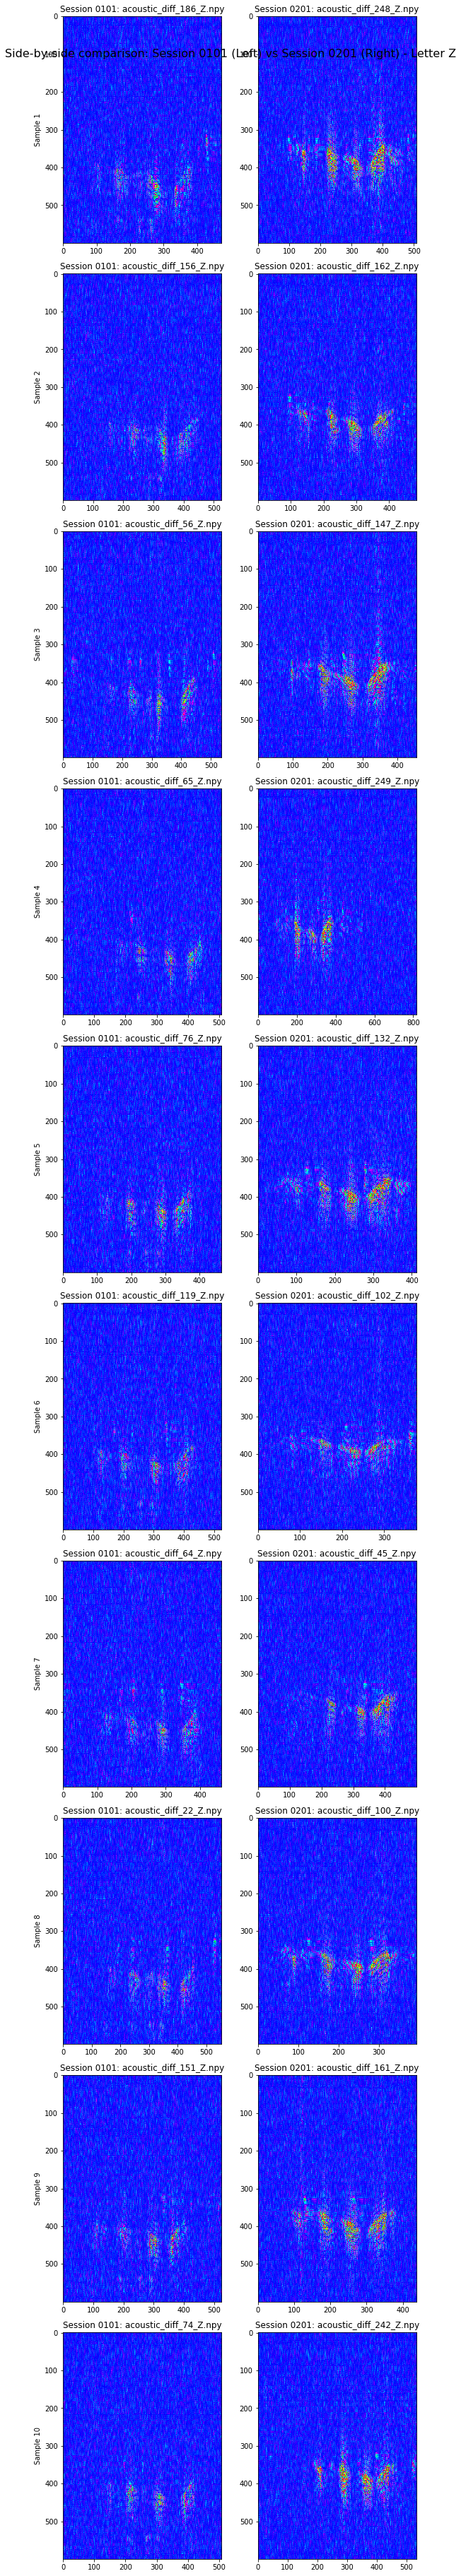

Displayed 10 pairs of files for letter Z
Left session files: 10
Right session files: 10


In [10]:
# Side-by-side comparison of both sessions
left_data_dir = '/data/asl_test/dataset/session_0101/acoustic/diff/'
right_data_dir = '/data/asl_test/dataset/session_0201/acoustic/diff/'

left_npy_files = glob.glob(os.path.join(left_data_dir, '*.npy'))
right_npy_files = glob.glob(os.path.join(right_data_dir, '*.npy'))

letter = 'Z'  # You can change this to any letter
left_files = [f for f in left_npy_files if f.endswith(f'_{letter}.npy')]
right_files = [f for f in right_npy_files if f.endswith(f'_{letter}.npy')]

# Find common files or use the minimum number of files
n_files = min(len(left_files), len(right_files))
if n_files == 0:
    print(f"No files found for letter {letter}")
else:
    left_files = left_files[:n_files]
    right_files = right_files[:n_files]

    # Compute global min/max for all images from both sessions
    all_left_vals = np.concatenate([np.load(f)[3].flatten() for f in left_files])
    all_right_vals = np.concatenate([np.load(f)[3].flatten() for f in right_files])
    all_vals = np.concatenate([all_left_vals, all_right_vals])
    global_min = np.percentile(all_vals, 0)
    global_max = np.percentile(all_vals, 99.97)

    # Get shape for aspect ratio
    sample_data = np.load(left_files[0])
    h, w = sample_data[3].shape
    subplot_width = 4
    subplot_height = subplot_width * h / w
    fig_width = subplot_width * 2  # 2 columns for left/right
    fig_height = subplot_height * n_files

    fig, axes = plt.subplots(n_files, 2, figsize=(fig_width, fig_height))
    fig.suptitle(f'Side-by-side comparison: Session 0101 (Left) vs Session 0201 (Right) - Letter {letter}', fontsize=16)

    for idx in range(n_files):
        # Left session (session_0101)
        left_data = np.load(left_files[idx])
        left_channel_4 = left_data[3]
        left_img = plot_profiles(left_channel_4, max_val=global_max, min_val=global_min)
        left_img_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
        
        # Right session (session_0201)
        right_data = np.load(right_files[idx])
        right_channel_4 = right_data[3]
        right_img = plot_profiles(right_channel_4, max_val=global_max, min_val=global_min)
        right_img_rgb = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)
        
        # Plot
        if n_files == 1:
            ax_left = axes[0]
            ax_right = axes[1]
        else:
            ax_left = axes[idx, 0]
            ax_right = axes[idx, 1]
        
        ax_left.imshow(left_img_rgb, aspect='auto')
        ax_left.set_title(f'Session 0101: {os.path.basename(left_files[idx])}')
        ax_left.set_ylabel(f'Sample {idx+1}')
        
        ax_right.imshow(right_img_rgb, aspect='auto')
        ax_right.set_title(f'Session 0201: {os.path.basename(right_files[idx])}')
        
        # Remove y-axis labels for right column except the first one
        if idx > 0:
            ax_right.set_ylabel('')

    plt.tight_layout()
    plt.show()
    
    print(f"Displayed {n_files} pairs of files for letter {letter}")
    print(f"Left session files: {len(left_files)}")
    print(f"Right session files: {len(right_files)}")

In [ ]:
# Side-by-side comparison for all letters
left_data_dir = '/data/asl_test/dataset/session_0101/acoustic/diff/'
right_data_dir = '/data/asl_test/dataset/session_0201/acoustic/diff/'

left_npy_files = glob.glob(os.path.join(left_data_dir, '*.npy'))
right_npy_files = glob.glob(os.path.join(right_data_dir, '*.npy'))

letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

for letter in letters:
    left_files = [f for f in left_npy_files if f.endswith(f'_{letter}.npy')]
    right_files = [f for f in right_npy_files if f.endswith(f'_{letter}.npy')]
    
    # Find common files or use the minimum number of files
    n_files = min(len(left_files), len(right_files))
    if n_files == 0:
        print(f"No files found for letter {letter}")
        continue
        
    left_files = left_files[:n_files]
    right_files = right_files[:n_files]

    # Compute global min/max for all images from both sessions
    all_left_vals = np.concatenate([np.load(f)[3].flatten() for f in left_files])
    all_right_vals = np.concatenate([np.load(f)[3].flatten() for f in right_files])
    all_vals = np.concatenate([all_left_vals, all_right_vals])
    global_min = np.percentile(all_vals, 0)
    global_max = np.percentile(all_vals, 99.97)

    # Get shape for aspect ratio
    sample_data = np.load(left_files[0])
    h, w = sample_data[3].shape
    subplot_width = 4
    subplot_height = subplot_width * h / w
    fig_width = subplot_width * 2  # 2 columns for left/right
    fig_height = subplot_height * n_files

    fig, axes = plt.subplots(n_files, 2, figsize=(fig_width, fig_height))
    fig.suptitle(f'Side-by-side comparison: Session 0101 (Left) vs Session 0201 (Right) - Letter {letter}', fontsize=16)

    for idx in range(n_files):
        # Left session (session_0101)
        left_data = np.load(left_files[idx])
        left_channel_4 = left_data[3]
        left_img = plot_profiles(left_channel_4, max_val=global_max, min_val=global_min)
        left_img_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
        
        # Right session (session_0201)
        right_data = np.load(right_files[idx])
        right_channel_4 = right_data[3]
        right_img = plot_profiles(right_channel_4, max_val=global_max, min_val=global_min)
        right_img_rgb = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)
        
        # Plot
        if n_files == 1:
            ax_left = axes[0]
            ax_right = axes[1]
        else:
            ax_left = axes[idx, 0]
            ax_right = axes[idx, 1]
        
        ax_left.imshow(left_img_rgb, aspect='auto')
        ax_left.set_title(f'Session 0101: {os.path.basename(left_files[idx])}')
        ax_left.set_ylabel(f'Sample {idx+1}')
        
        ax_right.imshow(right_img_rgb, aspect='auto')
        ax_right.set_title(f'Session 0201: {os.path.basename(right_files[idx])}')
        
        # Remove y-axis labels for right column except the first one
        if idx > 0:
            ax_right.set_ylabel('')

    plt.tight_layout()
    plt.show()
    
    print(f"Letter {letter}: {n_files} pairs displayed")
    print(f"  Left session files: {len(left_files)}")
    print(f"  Right session files: {len(right_files)}")
    print("-" * 50)